In [ ]:
import numpy as np

In [ ]:
np.array([1, 2, 3])

In [ ]:
np.array([[1, 2, 3], [4, 5, 6]])

In [ ]:
b = np.array([[1, 2, 3], [4, 5, 6]])

In [ ]:
a = np.array([1,2,3])

In [ ]:
b.ndim

In [ ]:
c = np.array([[1, 2, 3], [4, 5, 6,7,8,9]])
c

In [ ]:
c.shape

In [ ]:
a = np.array([1, 2, 3])
a

In [ ]:
a.shape

In [ ]:
np.zeros((2,6))

In [ ]:
np.random.random((3,5))

In [ ]:
import random
for i in range(10):
    random.seed(1)
    print(random.randint(1,10000))

In [ ]:
a = np.array([[np.NAN,10,20],[100,np.NAN,20]])
a

In [ ]:
a*2

In [ ]:
b = np.nan_to_num(a)

In [ ]:
b

In [ ]:
c = np.array([[1,2,3,4]]) --> 2D and shape is (1,4) 
d = np.array([1,2,3,4])----->1D and shape is (4,) 

In [ ]:
np.full((3,4),1)

In [ ]:
np.arange(start,stop,step)

In [ ]:
np.arange(0,19,2)

In [ ]:
np.linspace(1,10,5)

In [ ]:
a = np.array([1,2,3.3,"India"])
print(a.dtype)
print(a)

In [ ]:
a = np.array([1, 2, 3])
a
a = np.append(a,5)
a
a = np.insert(a,-1,78)
a

In [ ]:
a = np.array([1, 2, 3])
print(a[-1])
a = np.insert(a,3,78)
a

In [ ]:
# importing the module
import numpy as np
	
# creating an array
gfg = np.array([1, 2, 3])
print("Original array:")
display(gfg)

# using reshape()
print("Changed array")
display(gfg.reshape(3, 1))
	
print("Original array:")
display(gfg)


In [ ]:
# importing the module
import numpy as np
	
# creating an array
gfg = np.array([1, 2, 3, 4, 5, 6])
print("Original array:")
display(gfg)

# using resize()
print("Changed array")
# this will print nothing as None is returned
display(gfg.resize(2, 3))
	
print("Original array:")
display(gfg)


In [ ]:
x = np.arange(16.0).reshape(4, 4)

print(x)
np.hsplit(x, 2)
np.hsplit(x, np.array([1, 2,3]))


In [ ]:
# Normal List
a = [1,2,3,4,5,6,7,8,9,10]

In [ ]:
type(a)

In [ ]:
import numpy as np
import sys

In [ ]:
# Numpy array
b = np.array([1,2,3,4,5,6,7,8,9,10])

In [ ]:
type(b)

In [ ]:
sys.getsizeof(1)*len(a)

In [ ]:
b.itemsize*b.size

In [ ]:
import datetime
l = [i for i in range(1000000)]
#print(l)
start = datetime.datetime.now()
l = [i+20 for i in l]
end = datetime.datetime.now()
#print(l)

end-start

In [ ]:
import numpy as np
import datetime
l = np.array([i for i in range(1000000)])
#print(l)
start = datetime.datetime.now()
l += 20
end = datetime.datetime.now()
#print(l)

end-start

In [ ]:
import numpy as np

In [ ]:
len(dir(np))

In [ ]:
np.version.version

In [ ]:
!pip install numpy

In [ ]:
## Pandas vs Numpy - 0 to 50K - 50K to 500K - More than 500K

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-pastel")
%matplotlib inline
import seaborn as sns
import numpy as np
from timeit import timeit 
import sys

In [5]:
iris = sns.load_dataset('iris')

In [6]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
type(iris)

pandas.core.frame.DataFrame

In [8]:
data = pd.concat([iris]*100000)
data_rec = data.to_records()

In [12]:
print(type(data))
print(type(data_rec))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.recarray'>


In [9]:
print (len(data), len(data_rec))

15000000 15000000


In [ ]:
#Here I have loaded the iris dataset and replicated it so as to have 15MM rows of data. 
#The space requirement for 15MM rows of data in a pandas dataframe is more than twice that of a numpy recarray.

In [10]:
MB = 1024*1024
print("Pandas %d MB " % (sys.getsizeof(data)/MB))
print("Numpy %d MB " % (sys.getsizeof(data_rec)/MB))

Pandas 1506 MB 
Numpy 686 MB 


In [13]:
# <!-- collapse=True -->
def perf(inp, statement, grid=None):
    length = len(inp) 
    gap = int(length/5)
    #grid = np.array([int(x) for x in np.logspace(np.log10(gap), np.log10(length+1) , 5)])
    if grid is None:
        grid = np.array([10000, 100000, 1000000, 5000000, 10000000])
    num = 100
    time = []
    data = {'pd': pd, 'np': np}
    for i in grid:
        if isinstance(inp, pd.DataFrame):
            sel = inp.iloc[:i]
            data['data'] = sel
        else:
            sel = inp[:i]
            data['data_rec'] = sel
        t = timeit(stmt=statement, globals=data, number=num)
        time.append(t/num)
    return grid, np.array(time)

def bench(pd_inp, pd_stmt, np_inp, np_stmt, title="", grid=None):
    g,v1 = perf(pd_inp, pd_stmt, grid)
    g,v2 = perf(np_inp, np_stmt, grid)
    fig, ax = plt.subplots()
    ax.loglog()
    ax.plot(g, v1, label="pandas",marker="o", lw=2)
    ax.plot(g, v2, label="numpy", marker="v", lw=2)
    ax.set_xticks(g)
    plt.legend(loc=2)
    plt.xlabel("Number of Records")
    plt.ylabel("Time (s)")
    plt.grid(True)
    plt.xlim(min(g)/2,max(g)*2)
    plt.title(title)

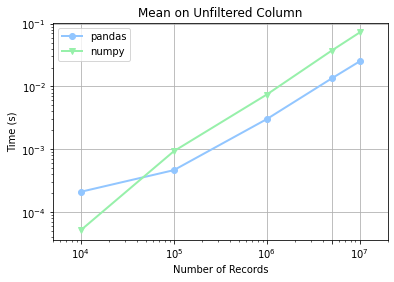

In [17]:
bench(data, "data.loc[:, 'sepal_width'].mean()", 
      data_rec, "np.mean(data_rec.sepal_width)",
     title="Mean on Unfiltered Column")

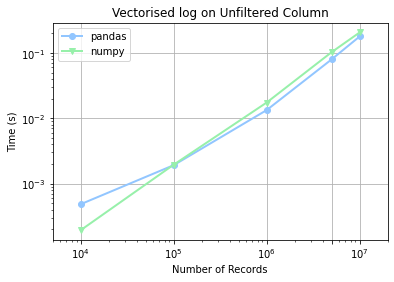

In [15]:
bench(data, "np.log(data.loc[:, 'sepal_length'])",
      data_rec, "np.log(data_rec.sepal_length)",
     title="Vectorised log on Unfiltered Column")

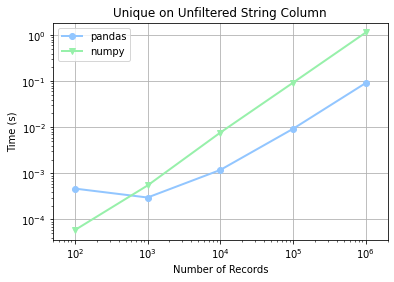

In [16]:
bench(data, "data.loc[:,'species'].unique()",
      data_rec, "np.unique(data_rec.species)", 
      grid=np.array([100, 1000, 10000, 100000, 1000000]),
     title="Unique on Unfiltered String Column")

In [ ]:
## Array mathematics 

In [ ]:
import numpy as np

In [ ]:
np.sum([10,20])

In [ ]:
a = np.array([10,20,30])
b = np.array([30,40,50])
np.subtract(a,b)

In [ ]:
a = np.array([[10,20,30],[30,40,60]])

In [ ]:
np.divide([10,20,30],[30,40,60])

In [ ]:
np.sum([[10,20,30],[30,40,60]], axis = 0)

In [ ]:
np.sum([[10,20,30],[30,40,60]], axis = 1)

In [ ]:
np.sum(a)

In [ ]:
a

In [ ]:
np.exp(a)

In [ ]:
## Array comparison 

In [ ]:
a = np.array([10,20,30])
b = np.array([10,20,30])
c = np.array([11,20,33])

In [ ]:
np.equal(a,c)

In [ ]:
np.array_equal(a,c)

In [ ]:
## Correl coeff
a = np.array([10,20,30,40])
b = np.array([30,20,10,50])
np.corrcoef(a,b)

In [ ]:
## Slicing 

In [ ]:
a = np.array([10,20,30,40,50,60,70,80,90])

In [ ]:
a[0:4]

In [ ]:
a[-9:-5]

In [ ]:
a[:4]

In [ ]:
a[:-5]

In [ ]:
a[0:-5]

In [ ]:
a[-9:4]

In [ ]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a

In [ ]:
# Get 1
print(a[0][0])

# print(a[ROW,COL])
print(a[0,0])

print(a[:1,:1])
print(a[:-2,:-2])

In [ ]:
# Get 1
print(type(a[0][0]))

# print(a[ROW,COL])
print(type(a[0,0]))

print(type(a[:1,:1]))
print(type(a[:-2,:-2]))

In [ ]:
# Get [1,2,3]
print(a[0])
print(a[:1])


In [ ]:
## Get 
## [2,3]
## [5,6]

print(a[:2,1:])

print(a[-3:-1,-2:])

print(a[:-1,1:])
print(a[0:2,1:])

In [ ]:
## Get [5,8]

print(a[1:,1:2])
print(a[1:,-2])

In [ ]:
## Get [5,6]

print(a[1:2,1:])

In [ ]:
## Get [5,6]

print(a[1:,1:])

In [ ]:
### Stacks and concatination

In [ ]:
a = np.array([1,2,3])
b = np.array([11,22,33])

In [ ]:
## Concatinate
np.concatenate((a,b),axis = 0)

In [ ]:
## Stack 

np.vstack((a,b))

In [ ]:
np.hstack((a,b))

In [ ]:
np.column_stack((a,b))

In [ ]:
a = np.array([1,2,3,4,5,6,7])

In [ ]:
a[6]

In [ ]:
## np.insert(Array,Position,Value)

np.insert(a,2,12)

In [ ]:
np.insert(a,0,12)

In [ ]:
np.insert(a,len(a),12)

In [ ]:
np.insert(a,7,12)

In [ ]:
np.append(a,12)

In [ ]:
# Hsplit and Vsplit 

a = np.arange(36).reshape(6,6)
print(a)
print("######### HSPLIT ###########")
print(np.hsplit(a,2))
print("######### VSPLIT ###########")
print(np.vsplit(a,2))

In [ ]:
a = np.array([[1,22,43],[4,15,6]])
a

In [ ]:
a.ravel()

In [ ]:
a.flatten()

In [ ]:
b = a.ravel()
b

In [ ]:
b.sort()
b

In [ ]:
## Ref Cell 
# Green - Edit mode 
# Blue - Execution mode 

## Run - Ctrl + enter 

## Insert cell above - a
## Insert cell below - b
## Delete cell - dd

# This is a wonderful world
## This is a wonderful world
### This is a wonderful world
#### This is a wonderful world
##### This is a wonderful world
###### This is a wonderful world
######## This is a wonderful world